# Calculating SHAP Values for GBM models in H2O

Note: this example is adapted from an example published in the shap package https://github.com/slundberg/shap/blob/master/notebooks/tree_explainer/Front%20page%20example%20(XGBoost).ipynb

In [1]:
import h2o
import shap
from h2o.estimators.gbm import H2OGradientBoostingEstimator
from h2o import H2OFrame

# initialize H2O
h2o.init()

# load JS visualization code to notebook
shap.initjs()

versionFromGradle='3.23.0',projectVersion='3.23.0.99999',branch='michalk_treeshap-expose',lastCommitHash='e945ade4bf70cb04112390d86e1af63d14c53832',gitDescribe='jenkins-master-4610-17-ge945ade-dirty',compiledOn='2019-03-21 11:02:19',compiledBy='mkurka'
Checking whether there is an H2O instance running at http://localhost:54321 . connected.
versionFromGradle='3.23.0',projectVersion='3.23.0.99999',branch='michalk_treeshap-expose',lastCommitHash='e945ade4bf70cb04112390d86e1af63d14c53832',gitDescribe='jenkins-master-4610-17-ge945ade-dirty',compiledOn='2019-03-21 11:02:19',compiledBy='mkurka'


H2O cluster uptime:,2 mins 01 secs
H2O cluster timezone:,America/Los_Angeles
H2O data parsing timezone:,UTC
H2O cluster version:,3.23.0.99999
H2O cluster version age:,1 hour and 25 minutes
H2O cluster name:,mkurka
H2O cluster total nodes:,1
H2O cluster free memory:,3.277 Gb
H2O cluster total cores:,8
H2O cluster allowed cores:,8
H2O cluster status:,"locked, healthy"


In [2]:
# train a GBM model in H2O
X, y = shap.datasets.boston()
boston_housing = H2OFrame(X).cbind(H2OFrame(y, column_names=["medv"]))

model = H2OGradientBoostingEstimator(learn_rate=0.01, ntrees=100)
model.train(training_frame=boston_housing, y="medv")

Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
gbm Model Build progress: |███████████████████████████████████████████████| 100%


In [3]:
# calculate SHAP values using function predict_contributions
contributions = model.predict_contributions(boston_housing)

In [4]:
# convert the H2O Frame to use with shap's visualization functions
contributions_matrix = contributions.as_data_frame().values
# shap values are calculated for all features
shap_values = contributions_matrix[:,0:13]
# expected values is the last returned column
expected_value = contributions_matrix[:,13].min()

In [5]:
# visualize the first prediction's explanation
shap.force_plot(expected_value, shap_values[0,:], X.iloc[0,:])

In [6]:
# visualize the training set predictions
shap.force_plot(expected_value, shap_values, X)

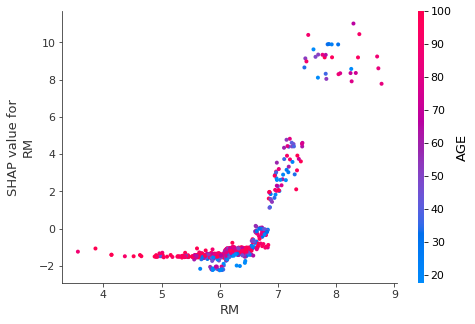

In [7]:
# create a SHAP dependence plot to show the effect of a single feature across the whole dataset
shap.dependence_plot("RM", shap_values, X)

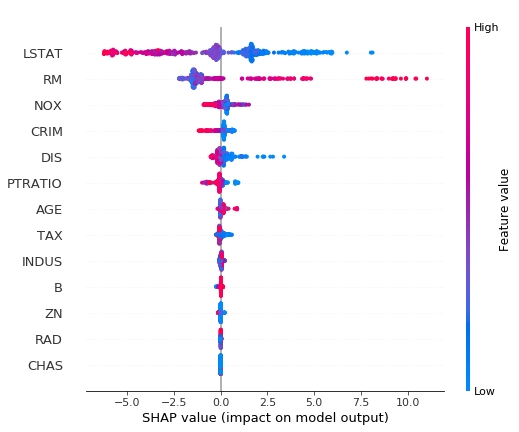

In [8]:
# summarize the effects of all the features
shap.summary_plot(shap_values, X)

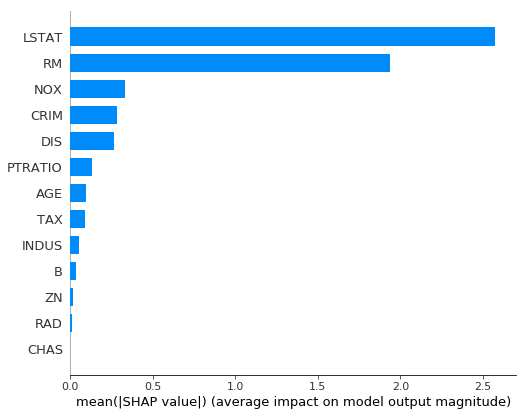

In [9]:
shap.summary_plot(shap_values, X, plot_type="bar")